In [221]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc

In [222]:
# Task 1 part 1

data = pd.read_csv('Diabetes.csv')

print('Data before cleaning\n\n')
print(data.describe())

data.loc[data['PGL'] == 0, 'PGL'] = round(data['PGL'].mean())
data.loc[data['DIA'] == 0, 'DIA'] = round(data['DIA'].mean())
data.loc[data['TSF'] == 0, 'TSF'] = round(data['TSF'].mean())
data.loc[data['INS'] == 0, 'INS'] = round(data['INS'].mean())
data.loc[data['BMI'] == 0, 'BMI'] = round(data['BMI'].mean())


# data = data.loc[~(data['PGL'] == 0)]


# data = data.loc[~(data['DIA'] == 0)]


# data = data.loc[~(data['TSF'] == 0)]


# data = data.loc[~(data['INS'] == 0)]
# data = data.loc[~(data['BMI'] == 0)]
print('\n\nData after cleaning\n\n')



print(data.describe())

Data before cleaning


              NPG         PGL         DIA         TSF         INS         BMI  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

              DPF         AGE    Diabetic  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.0000

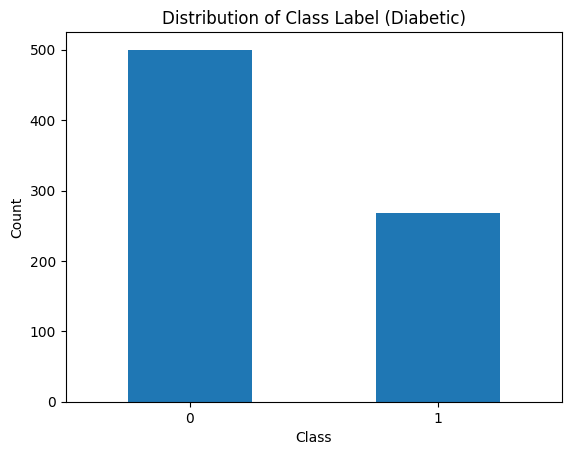

Number of negative Diabetes resuts: 500
Number of positive Diabetes resuts: 268
Data is skewed to the left, since negative results almost double positive results


In [223]:
# Task 1 part 2


data['Diabetic'].value_counts().plot(kind='bar')

plt.xlabel('Class')

plt.ylabel('Count')
plt.xticks(rotation=0)

plt.title('Distribution of Class Label (Diabetic)')

plt.show()

print('Number of negative Diabetes resuts: ' +
      str(data.loc[data['Diabetic'] == 0].shape[0]))
print('Number of positive Diabetes resuts: ' +
      str(data.loc[data['Diabetic'] == 1].shape[0]))
print('Data is skewed to the left, since negative results almost double positive results')

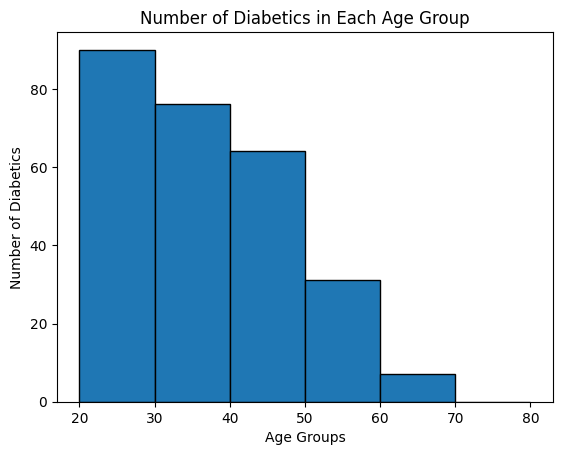

In [224]:
# Task 1 part 3


bins = [20, 30, 40, 50, 60, 70, 80]
group = pd.read_csv('Diabetes.csv')
group['AgeGroup'] = pd.cut(group['AGE'], bins, labels=bins[:-1])
diabeticAges = group[group['Diabetic'] == 1]['AgeGroup']

plt.hist(diabeticAges, bins=bins, edgecolor='black')
plt.xlabel('Age Groups')
plt.ylabel('Number of Diabetics')
plt.title('Number of Diabetics in Each Age Group')
plt.show()

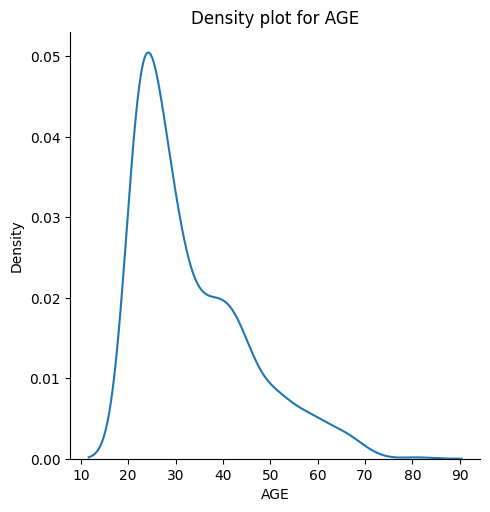

In [225]:
# Task 1 part 4


sb.displot(data['AGE'], kind='kde')
plt.title('Density plot for AGE')

plt.show()

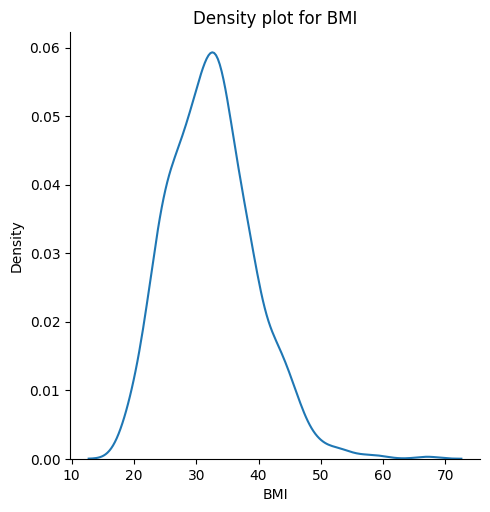

In [226]:
# Task 1 part 5


sb.displot(data['BMI'], kind='kde')
plt.title('Density plot for BMI')

plt.show()

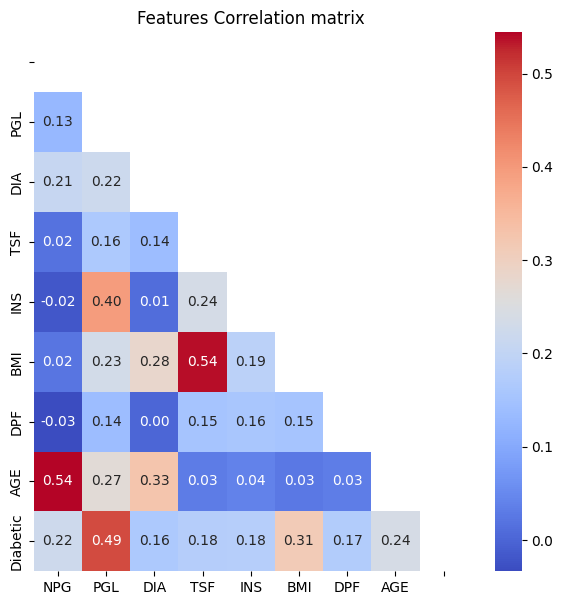

some features has decent correlation between them, others less of it,

it can be seen that theres decent correlation between BMI & TSF of 0.54, which makes sense since body mass
is very correlated to body fat,

also age is correlated decently with pregnancy since theres a hgiher probably that an older woman has been
pregnant more times, it also has a value of 0.54,

another good correlations would be glucose concentration and insulin anzyme which has a value of 0.4,

glucose concentration and diabetes of value 0.49 which also makes sense because diabetes involves glucose
staying in blood,

and body mass and diabetes with a value of 0.31.

theres also features that are extremely not correlated like number of pregnancies and body mass or insulin
with values of -0.02, whcih have nothing to do with each other.

from the correlation matrix it can be concluded that the most important features to age are: NPG,PGL,DIA
and most important features that indicate if a paerson is diabetic or not ar

In [227]:
# Task 1 part 6


corr_matrix = data.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(7, 7))

ax = sb.heatmap(corr_matrix, annot=True, fmt=".2f", mask=mask, cmap="coolwarm")
plt.title('Features Correlation matrix')
xticklabels = [label.get_text() for label in ax.get_xticklabels()]
yticklabels = [label.get_text() for label in ax.get_yticklabels()]
npg_index = yticklabels.index('NPG')
yticklabels[npg_index] = ''
ax.set_yticklabels(yticklabels)
npg_index = xticklabels.index('Diabetic')
xticklabels[npg_index] = ''
ax.set_xticklabels(xticklabels)

plt.show()
print('some features has decent correlation between them, others less of it,\n\nit can be seen that theres decent correlation between BMI & TSF of 0.54, which makes sense since body mass\nis very correlated to body fat,\n\nalso age is correlated decently with pregnancy since theres a hgiher probably that an older woman has been\npregnant more times, it also has a value of 0.54,\n\nanother good correlations would be glucose concentration and insulin anzyme which has a value of 0.4,\n\nglucose concentration and diabetes of value 0.49 which also makes sense because diabetes involves glucose\nstaying in blood,\n\nand body mass and diabetes with a value of 0.31.\n\ntheres also features that are extremely not correlated like number of pregnancies and body mass or insulin\nwith values of -0.02, whcih have nothing to do with each other.\n\nfrom the correlation matrix it can be concluded that the most important features to age are: NPG,PGL,DIA\nand most important features that indicate if a paerson is diabetic or not are: PGL,BMI,AGE.')

In [234]:
# Task 1 part 7


data = data.sample(frac=1)

train_size = int(0.8 * len(data))

train_set = data[:train_size]

test_set = data[train_size:]

In [235]:
# task 2 part 1

yTrain = train_set[['AGE']]
xTrain = train_set[['NPG', 'PGL', 'DIA', 'TSF', 'INS', 'BMI', 'DPF']]
xTest = test_set[['NPG', 'PGL', 'DIA', 'TSF', 'INS', 'BMI', 'DPF']]

scaler = StandardScaler()
scaler.fit(xTrain)
xTrainScaled = scaler.transform(xTrain)
xTestScaled = scaler.transform(xTest)
LR1 = LinearRegression()
LR1.fit(xTrainScaled, yTrain)
ypred1 = LR1.predict(xTestScaled)

In [236]:
# task 2 part 2

yTrain = train_set[['AGE']]
xTrain = train_set[['NPG']]
xTest = test_set[['NPG']]

scaler = StandardScaler()
scaler.fit(xTrain)
xTrainScaled = scaler.transform(xTrain)
xTestScaled = scaler.transform(xTest)
LR2 = LinearRegression()
LR2.fit(xTrainScaled, yTrain)
ypred2 = LR2.predict(xTestScaled)

print('this model was created using the independant feature NPG, since it has the highest correlation with the AGE class,\nthis information is conducted from the correlation matrix plotted earlier.')

this model was created using the independant feature NPG, since it has the highest correlation with the AGE class,
this information is conducted from the correlation matrix plotted earlier.


In [237]:
# task 2 part 3

yTrain = train_set[['AGE']]
xTrain = train_set[['NPG', 'PGL', 'DIA']]
xTest = test_set[['NPG', 'PGL', 'DIA']]

scaler = StandardScaler()
scaler.fit(xTrain)
xTrainScaled = scaler.transform(xTrain)
xTestScaled = scaler.transform(xTest)
LR3 = LinearRegression()
LR3.fit(xTrainScaled, yTrain)
ypred3 = LR3.predict(xTestScaled)

print('this model was created using the independant features NPG,PGL,DIA since they are the top 3 highest correlation with\nthe AGE class, this information is conducted from the correlation matrix plotted earlier.')

this model was created using the independant features NPG,PGL,DIA since they are the top 3 highest correlation with
the AGE class, this information is conducted from the correlation matrix plotted earlier.


In [238]:
# task 2 part 4

yTest = test_set[['AGE']]

MAE1 = mean_absolute_error(yTest, ypred1)
print('Mean Absolute Error 1 (all features):', MAE1)

MAE2 = mean_absolute_error(yTest, ypred2)
print('Mean Absolute Error 2 (most important feature):', MAE2)

MAE3 = mean_absolute_error(yTest, ypred3)
print('Mean Absolute Error 3 (top 3 features):', MAE3)

print('\n3 models were created to learn the age class, first one included all independant features, second one only the most\ncorrelated one, and finally third model included the 3 most correlated features with AGE, from the MAE tests, first\nand last models gave similer results, since the last test included the most important features, so then the rest\nless important features didnt affect much the first test, however the second test that included only the most\nimportant feature had slightly worse error, because it excluded other important features.\n\ntherefor model 1 scored the best, this is because it included all the features, which all had some correlation to\nthem even that theres a high difference between top 3 and the rest.\nMAE measurement was choosen because its better suited for comparing models to each other.')

Mean Absolute Error 1 (all features): 6.113652916906744
Mean Absolute Error 2 (most important feature): 7.0336925208822745
Mean Absolute Error 3 (top 3 features): 6.230496142891609

3 models were created to learn the age class, first one included all independant features, second one only the most
correlated one, and finally third model included the 3 most correlated features with AGE, from the MAE tests, first
and last models gave similer results, since the last test included the most important features, so then the rest
less important features didnt affect much the first test, however the second test that included only the most
important feature had slightly worse error, because it excluded other important features.

therefor model 1 scored the best, this is because it included all the features, which all had some correlation to
them even that theres a high difference between top 3 and the rest.
MAE measurement was choosen because its better suited for comparing models to each other.


In [239]:
# 4 Classification knn models fitting and prediction, with accuracy results

yTrain = train_set[['Diabetic']]
xTrain = train_set[['NPG', 'PGL', 'DIA', 'TSF', 'INS', 'BMI', 'DPF', 'AGE']]
xTest = test_set[['NPG', 'PGL', 'DIA', 'TSF', 'INS', 'BMI', 'DPF', 'AGE']]
yTest = test_set[['Diabetic']]

scaler = StandardScaler()
scaler.fit(xTrain)

xTrainScaled = scaler.transform(xTrain)
xTestScaled = scaler.transform(xTest)
knn1 = KNeighborsClassifier(n_neighbors=1)
knn2 = KNeighborsClassifier(n_neighbors=10)
knn3 = KNeighborsClassifier(n_neighbors=20)
knn4 = KNeighborsClassifier(n_neighbors=30)

knn1.fit(xTrainScaled, yTrain.values.ravel())
yClass1 = knn1.predict(xTestScaled)

knn2.fit(xTrainScaled, yTrain.values.ravel())
yClass2 = knn2.predict(xTestScaled)

knn3.fit(xTrainScaled, yTrain.values.ravel())
yClass3 = knn3.predict(xTestScaled)

knn4.fit(xTrainScaled, yTrain.values.ravel())
yClass4 = knn4.predict(xTestScaled)

acc1 = accuracy_score(yTest, yClass1)
acc2 = accuracy_score(yTest, yClass2)
acc3 = accuracy_score(yTest, yClass3)
acc4 = accuracy_score(yTest, yClass4)

print('Accuracy model 1 (k=1):', acc1)
print('Accuracy model 2 (k=10):', acc2)
print('Accuracy model 3 (k=20):', acc3)
print('Accuracy model 4 (k=30):', acc4)

Accuracy model 1 (k=1): 0.6623376623376623
Accuracy model 2 (k=10): 0.7857142857142857
Accuracy model 3 (k=20): 0.7987012987012987
Accuracy model 4 (k=30): 0.8116883116883117


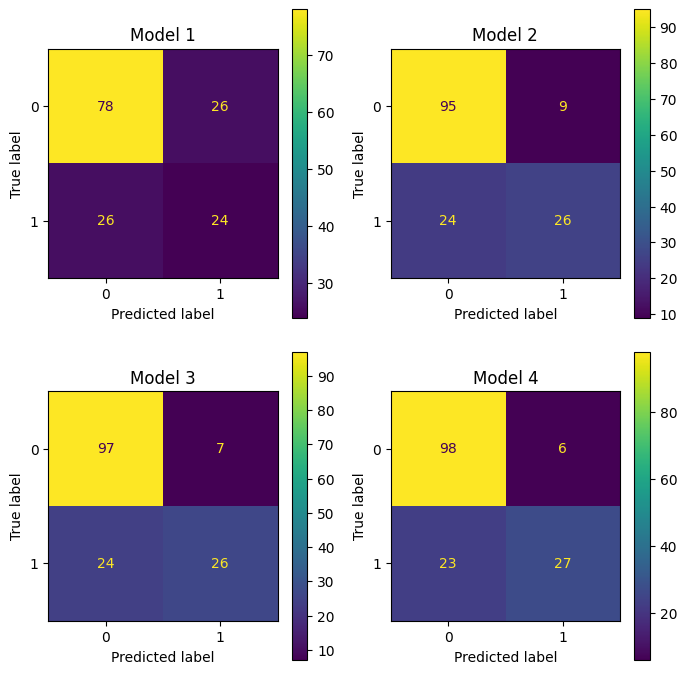

In [240]:
# confusion matrix for the 4 classes

cm1 = confusion_matrix(yTest, yClass1)
cm2 = confusion_matrix(yTest, yClass2)
cm3 = confusion_matrix(yTest, yClass3)
cm4 = confusion_matrix(yTest, yClass4)

fig, axs = plt.subplots(2, 2, figsize=(7, 7))

disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp1.plot(ax=axs[0, 0])
axs[0, 0].set_title('Model 1')

disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot(ax=axs[0, 1])
axs[0, 1].set_title('Model 2')

disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3)
disp3.plot(ax=axs[1, 0])
axs[1, 0].set_title('Model 3')

disp4 = ConfusionMatrixDisplay(confusion_matrix=cm4)
disp4.plot(ax=axs[1, 1])
axs[1, 1].set_title('Model 4')

plt.tight_layout()
plt.show()

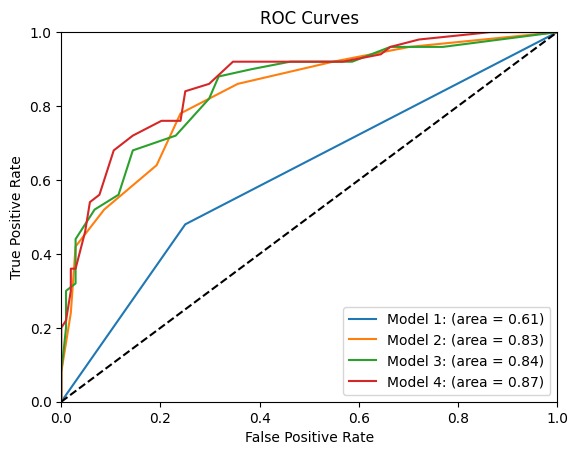

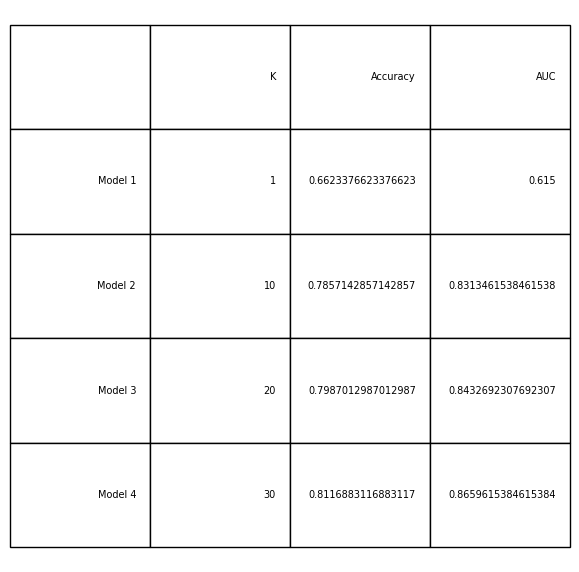

from all the different measurments, it can be observed that model 4 with 30k outperformed the other models, model 1
which uses 1k performed the worst since nearist 1 neightbor doesnt probably reflect or represent the actual
data distribution, increasing k to 10 and 20 increased the accuracy and AUC, because it probably covered more
neightbors which resulted in a better representation of the data, and after testing many k values, 30 seems to
perform well with an accuracy of 81%.


In [241]:
# ROC/AUC Score for the 4 models

y_scores1 = knn1.predict_proba(xTestScaled)[:, 1]
fpr1, tpr1, thresholds = roc_curve(yTest, y_scores1)
roc_auc1 = auc(fpr1, tpr1)

y_scores2 = knn2.predict_proba(xTestScaled)[:, 1]
fpr2, tpr2, thresholds = roc_curve(yTest, y_scores2)
roc_auc2 = auc(fpr2, tpr2)

y_scores3 = knn3.predict_proba(xTestScaled)[:, 1]
fpr3, tpr3, thresholds = roc_curve(yTest, y_scores3)
roc_auc3 = auc(fpr3, tpr3)

y_scores4 = knn4.predict_proba(xTestScaled)[:, 1]
fpr4, tpr4, thresholds = roc_curve(yTest, y_scores4)
roc_auc4 = auc(fpr4, tpr4)

plt.figure()
plt.plot(fpr1, tpr1, label='Model 1: (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label='Model 2: (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='Model 3: (area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, label='Model 4: (area = %0.2f)' % roc_auc4)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

# table display
cell_text = [['', 'K', 'Accuracy', 'AUC'],
             ['Model 1', '1', str(acc1), roc_auc1],
             ['Model 2', '10', str(acc2), roc_auc2],
             ['Model 3', '20', str(acc3), roc_auc3],
             ['Model 4', '30', str(acc4), roc_auc4]]
fig, ax = plt.subplots(figsize=(8, 8))
table = plt.table(cellText=cell_text, loc='center')
table.scale(1, 7)
plt.subplots_adjust(left=0.2, top=0.8)
plt.axis('off')
plt.grid(False)
plt.show()

print('from all the different measurments, it can be observed that model 4 with 30k outperformed the other models, model 1\nwhich uses 1k performed the worst since nearist 1 neightbor doesnt probably reflect or represent the actual\ndata distribution, increasing k to 10 and 20 increased the accuracy and AUC, because it probably covered more\nneightbors which resulted in a better representation of the data, and after testing many k values, 30 seems to\nperform well with an accuracy of 81%.')